In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
dataset=pd.read_csv('AirPassengers.csv')
dataset.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexDataset= dataset.set_index(['Month'])

In [4]:
from datetime import datetime
indexDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


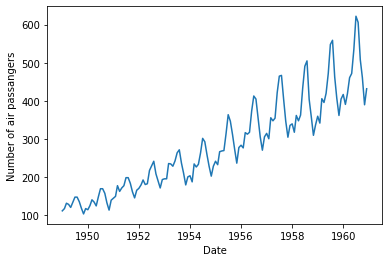

In [5]:
# plot graph.
plt.xlabel('Date')
plt.ylabel('Number of air passangers')
plt.plot(indexDataset)

In [6]:
# Determining rolling statistics
rolmean = indexDataset.rolling(window=12).mean()
rolstd = indexDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


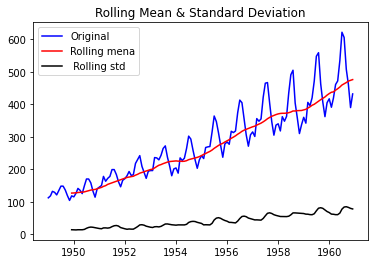

In [7]:
# Plot rolling statistics
orig= plt.plot(indexDataset, color='blue',label='Original')
mean= plt.plot(rolmean, color='red',label='Rolling mena')
std= plt.plot(rolstd, color='black', label=' Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
indexDataset.columns

Index(['#Passengers'], dtype='object')

In [9]:
# Perform Dickey Fuller test

from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test :')
dftest = adfuller(indexDataset['#Passengers'],autolag='AIC')

dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key]= value
    
print(dfoutput)    





Result of Dickey-Fuller Test :
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


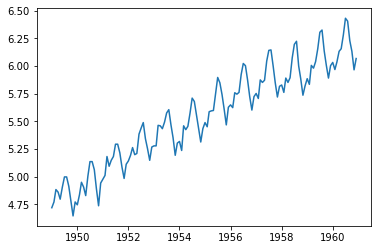

In [10]:
# First
indexDataset_logScale=np.log(indexDataset)
plt.plot(indexDataset_logScale)

In [20]:
print(indexDataset)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


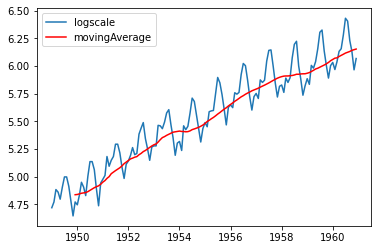

In [11]:
movingAverage= indexDataset_logScale.rolling(window=12).mean()
movingSTD= indexDataset_logScale.rolling(window=12).std()
plt.plot(indexDataset_logScale,label='logscale')
plt.plot(movingAverage, color='red', label='movingAverage')
plt.legend()

In [12]:
datasetLogScaleMinusMovingAverage=indexDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#removing non values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseriese):
    # Determing rolling statistics
    movingAverage= timeseriese.rolling(window=12).mean()
    movingSTD= timeseriese.rolling(window=12).std()
    
    # Plot rolling statistics
    
    orig= plt.plot(timeseriese, color='blue',label='Original')
    mean= plt.plot(movingAverage, color='red',label='Rolling Mean')
    std= plt.plot(movingSTD, color='black',label='Rolling std')
    plt.show(block=False)
    
    
    #Perform Dickey Fuller test:
    print('Result of Dickey-Fuller Test :')
    dftest = adfuller(timeseriese['#Passengers'],autolag='AIC')

    dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]= value

    print(dfoutput)    
    
    

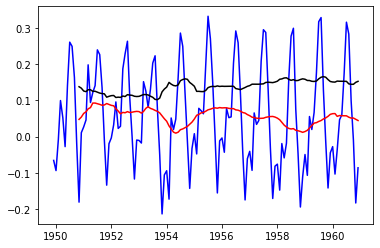

Result of Dickey-Fuller Test :
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [14]:
test_stationarity(datasetLogScaleMinusMovingAverage)

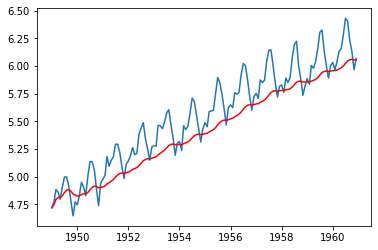

In [15]:
exponentialDecayWeightAverage= indexDataset_logScale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(indexDataset_logScale)
plt.plot(exponentialDecayWeightAverage,color='red')


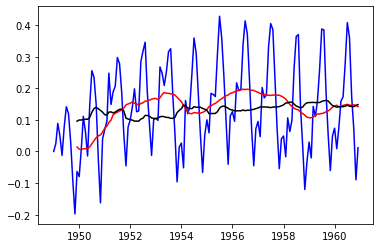

Result of Dickey-Fuller Test :
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
datasetLogScaleMinusExponentialDecayAverage= indexDataset_logScale-exponentialDecayWeightAverage
test_stationarity(datasetLogScaleMinusExponentialDecayAverage)

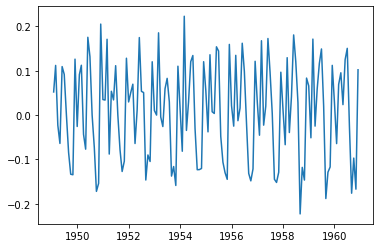

In [17]:
datasetlogDiffShifting= indexDataset_logScale-indexDataset_logScale.shift()
plt.plot(datasetlogDiffShifting)

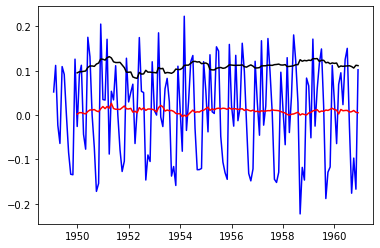

Result of Dickey-Fuller Test :
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [18]:
datasetlogDiffShifting.dropna(inplace=True)
test_stationarity(datasetlogDiffShifting)

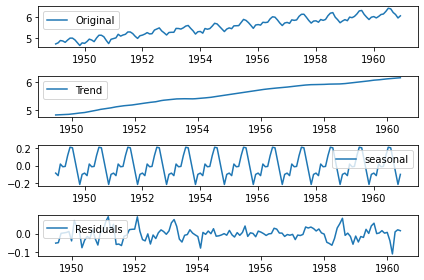

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(indexDataset_logScale)

trend= decomposition.trend
seasonal=decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(indexDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()





In [46]:
# decomposedLogData= residual
# decomposedLogData.dropna(inplace=True)
# test_stationarity(decomposedLogData)

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


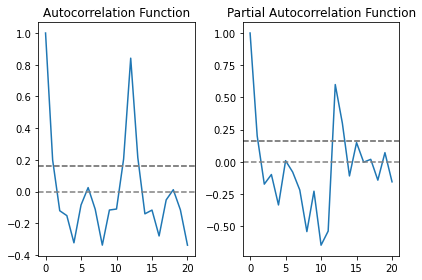

In [32]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogDiffShifting, nlags=20)
lag_pacf = pacf(datasetlogDiffShifting, nlags=20, method='ols')

#Plot PACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffShifting)),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


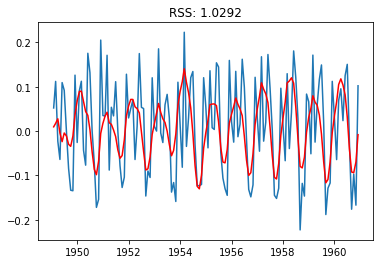

In [33]:
from statsmodels.tsa.arima_model import ARIMA

# AR MODEL

model=ARIMA(indexDataset_logScale, order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues-datasetlogDiffShifting['#Passengers'])**2))
print('Plotting AR model')




C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


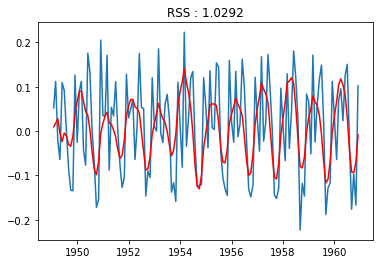

In [34]:
# MA MODEL

model = ARIMA(indexDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title("RSS : %.4f"% sum((results_ARIMA.fittedvalues-datasetlogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


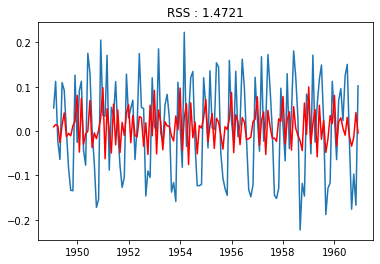

In [35]:
# MA MODEL

model = ARIMA(indexDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title("RSS : %.4f"% sum((results_MA.fittedvalues-datasetlogDiffShifting['#Passengers'])**2))
print('Plotting MA model')

In [36]:
predictions_ARIMA_dff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_dff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [39]:
# Convert to cumulative sum
predictions_ARIMA_dff_cusum= predictions_ARIMA_dff.cumsum()
print(predictions_ARIMA_dff_cusum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [40]:
predictions_ARIMA_log=pd.Series(indexDataset_logScale['#Passengers'].iloc[0], index= indexDataset_logScale.index)
predictions_ARIMA_log= predictions_ARIMA_log.add(predictions_ARIMA_dff_cusum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

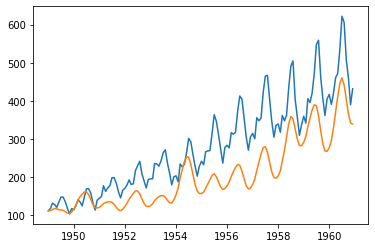

In [47]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexDataset)
plt.plot(predictions_ARIMA)

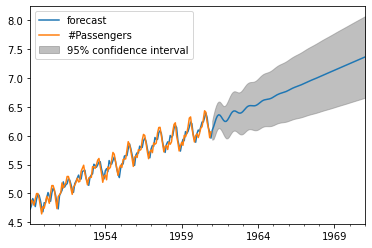

In [41]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

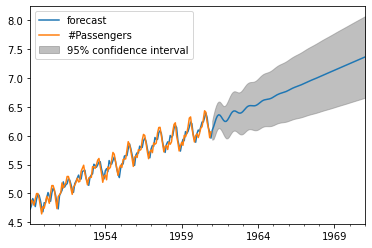

In [45]:
results_ARIMA.plot_predict(1,264)
results_ARIMA.forecast(steps=120)
x=results_ARIMA.forecast(steps=128)